# Разработка персонализированных предложений для постоянных покупателей интернет-магазина «В один клик»

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2">Описание данных</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-3">Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4">Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5">Исследовательский анализ данных</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-6">Объединение таблиц</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-7">Корреляционный анализ</a></span></li><li><span><a href="#Использование-пайплайнов" data-toc-modified-id="Использование-пайплайнов-8">Использование пайплайнов</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-9">Анализ важности признаков</a></span></li><li><span><a href="#Сегментация-покупателей" data-toc-modified-id="Сегментация-покупателей-10">Сегментация покупателей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-11">Вывод</a></span></li></ul></div>

## Описание проекта

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам интернет-магазина «В один клик», чтобы увеличить их покупательскую активность.  
  
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

## Описание данных

Данные для работы находятся в нескольких таблицах.  
  
**market_file.csv**  
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.  
- **id** — номер покупателя в корпоративной базе данных.
- **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
- **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
- **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
- **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
- **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
- **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  
  
**market_money.csv**  
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- **Выручка** — сумма выручки за период.  
  
**market_time.csv**  
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксировано общее время.
- **минут** — значение времени, проведённого на сайте, в минутах.  
  
**money.csv**  
Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- **id** — номер покупателя в корпоративной базе данных.
- **Прибыль** — значение прибыли.

## Загрузка данных

In [1]:
!pip install numpy==1.24.4 numba==0.57.0 scipy==1.10.1 contourpy==1.3.0 matplotlib==3.5.3 seaborn==0.11.2 -q
!pip install phik -q
!pip install -U scikit-learn -q
!pip install optuna -q
!pip install optuna.integration -q
!pip install shap -q

In [2]:
import os
import re
import phik
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, 
                                 OneHotEncoder, TargetEncoder,OrdinalEncoder)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn import set_config
from sklearn.impute import SimpleImputer
set_config(display='diagram')
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from optuna import distributions
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, IntDistribution, FloatDistribution
from scipy.stats import shapiro, normaltest, probplot

In [4]:
%%html
<style>
.output_png {
    display: flex;
    justify-content: center;
}
</style>

In [5]:
data_dir = '/datasets'
paths = {
    'market_file': os.path.join(data_dir, 'market_file.csv'),
    'market_money': os.path.join(data_dir, 'market_money.csv'),
    'market_time': os.path.join(data_dir, 'market_time.csv'),
    'money': os.path.join(data_dir, 'money.csv')
}

try:
    data_market_file = pd.read_csv(paths['market_file'])
    data_market_money = pd.read_csv(paths['market_money'])
    data_market_time = pd.read_csv(paths['market_time'])
    data_money = pd.read_csv(paths['money'], sep=';', decimal=',')
    
    print("✅ Данные успешно загружены")

except Exception as e:
    print(f"❌ Ошибка: {e}")

datasets = {
    "1. data_market_file": data_market_file,
    "2. data_market_money": data_market_money,
    "3. data_market_time": data_market_time,
    "4. data_money": data_money
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Размер: {df.shape}")
    print(df.head(2))
    print("\n" + "―" * 50 + "\n")

✅ Данные успешно загружены

1. data_market_file:
Размер: (1300, 13)
       id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  

――――――――――――――――――――――――――――――――――――――――――――――――――


2. data_market

Данные загружены и соответствуют описанию.

## Предобработка данных

Приведем наименования столбцов к стандарту snake-case и проверим данные на соответствие типов данных и на пропуски.

In [6]:
dataframes = {
    "data_market_file": data_market_file,
    "data_market_money": data_market_money,
    "data_market_time": data_market_time,
    "data_money": data_money
}

for name, df in dataframes.items():
    df.columns = [
        re.sub(r'(?<!^)(?=[A-Z])', '_', col)
        .replace(' ', '_')
        .lower()
        for col in df.columns
    ]

for name, df in dataframes.items():
    print(f"📊 {name}")
    display(df.info())
    print("\n" + "―" * 50 + "\n")



📊 data_market_file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_серв

None


――――――――――――――――――――――――――――――――――――――――――――――――――

📊 data_market_money
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None


――――――――――――――――――――――――――――――――――――――――――――――――――

📊 data_market_time
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None


――――――――――――――――――――――――――――――――――――――――――――――――――

📊 data_money
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None


――――――――――――――――――――――――――――――――――――――――――――――――――



Все типы данных соответствуют данным, пропусков не обнаружено.  
Проведем проверку категориальных признаков на неявные дубликаты.

In [7]:
def check_duplicates(df, column):
    unique_values = df[column].unique()
    print(f"\nУникальные значения в столбце '{column}':")
    print(unique_values)

for df_name, df in dataframes.items():
    print(f"\n=== {df_name} ===")
    
    object_cols = df.select_dtypes(include=['object']).columns
    
    if not object_cols.empty:
        for col in object_cols:
            check_duplicates(df, col)
    else:
        print("В этой таблице нет строковых столбцов")
    print("―" * 50)


=== data_market_file ===

Уникальные значения в столбце 'покупательская_активность':
['Снизилась' 'Прежний уровень']

Уникальные значения в столбце 'тип_сервиса':
['премиум' 'стандартт' 'стандарт']

Уникальные значения в столбце 'разрешить_сообщать':
['да' 'нет']

Уникальные значения в столбце 'популярная_категория':
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
――――――――――――――――――――――――――――――――――――――――――――――――――

=== data_market_money ===

Уникальные значения в столбце 'период':
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
――――――――――――――――――――――――――――――――――――――――――――――――――

=== data_market_time ===

Уникальные значения в столбце 'период':
['текущий_месяц' 'предыдцщий_месяц']
――――――――――――――――――――――――――――――――――――――――――――――――――

=== data_money ===
В этой таблице нет строковых столбцов
――――――――――――――――――――――――――――――――――――――――――――――――――


Отмечаем, что в data_market_file['тип_сервиса'] присутствует опечатка "стандартт", а в data_market_time['предыдцщий_месяц'] - "предыдцщий_месяц". Исправим.

In [8]:
dataframes["data_market_file"]['тип_сервиса'] = (
    dataframes["data_market_file"]['тип_сервиса']
    .str.replace('стандартт', 'стандарт')
)

dataframes["data_market_time"]['период'] = (
    dataframes["data_market_time"]['период']
    .str.replace('предыдцщий_месяц', 'предыдущий_месяц')
)

print("Исправленные значения в data_market_file['тип_сервиса']:")
print(dataframes["data_market_file"]['тип_сервиса'].unique())

print("\nИсправленные значения в data_market_time['период']:")
print(dataframes["data_market_time"]['период'].unique())

Исправленные значения в data_market_file['тип_сервиса']:
['премиум' 'стандарт']

Исправленные значения в data_market_time['период']:
['текущий_месяц' 'предыдущий_месяц']


Проверим данные на дубликаты.

In [9]:
for name, df in dataframes.items():
    duplicates = df.duplicated().sum()
    
    print(f"\n📊 {name}")
    print(f"Количество дубликатов: {duplicates}")


📊 data_market_file
Количество дубликатов: 0

📊 data_market_money
Количество дубликатов: 0

📊 data_market_time
Количество дубликатов: 0

📊 data_money
Количество дубликатов: 0


Устранили неявные дубликаты и опечатки. Пропусков и дубликатов в данных не оказалось. Типы данных корректны.

## Исследовательский анализ данных

Построим графики распределения и boxplot для числовых признаков.


data_market_file


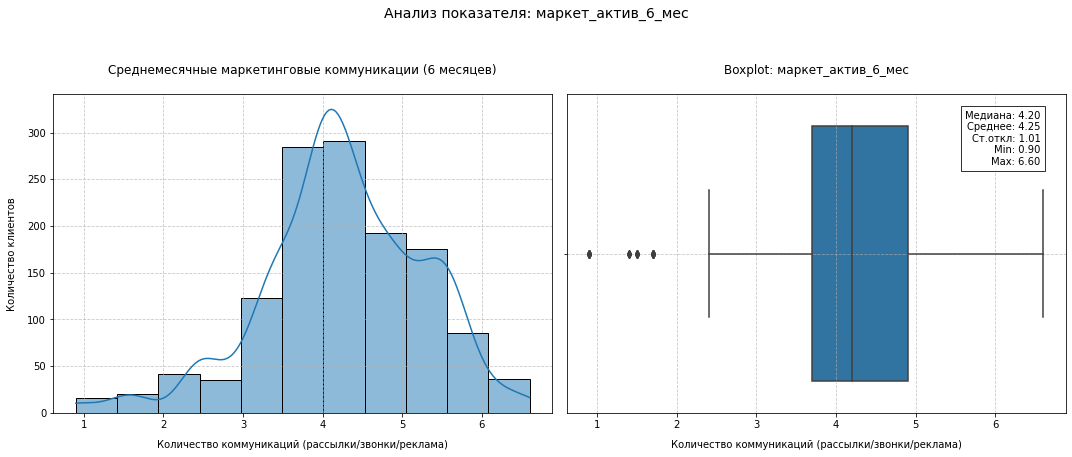

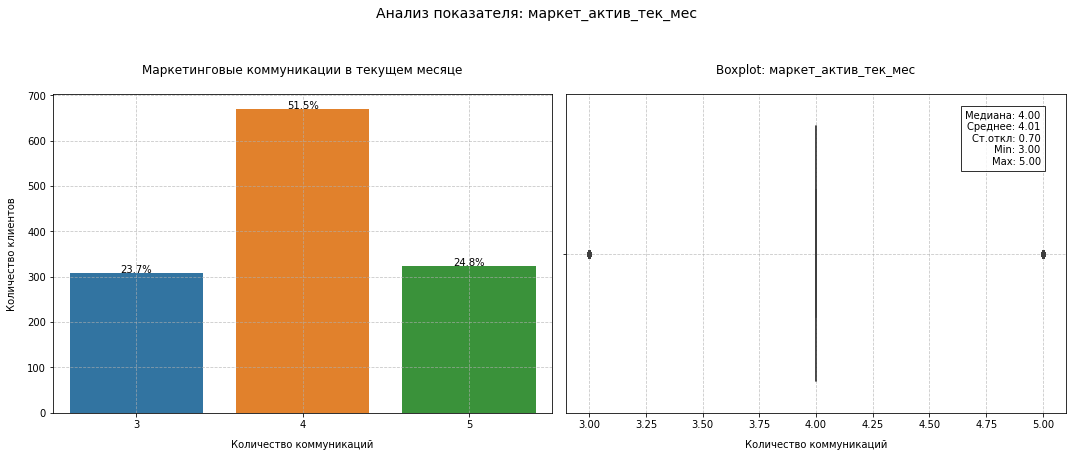

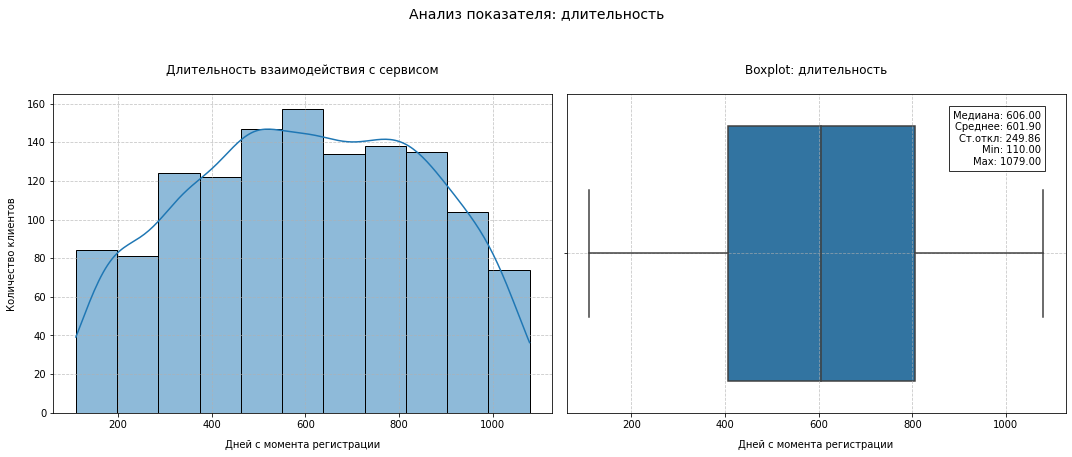

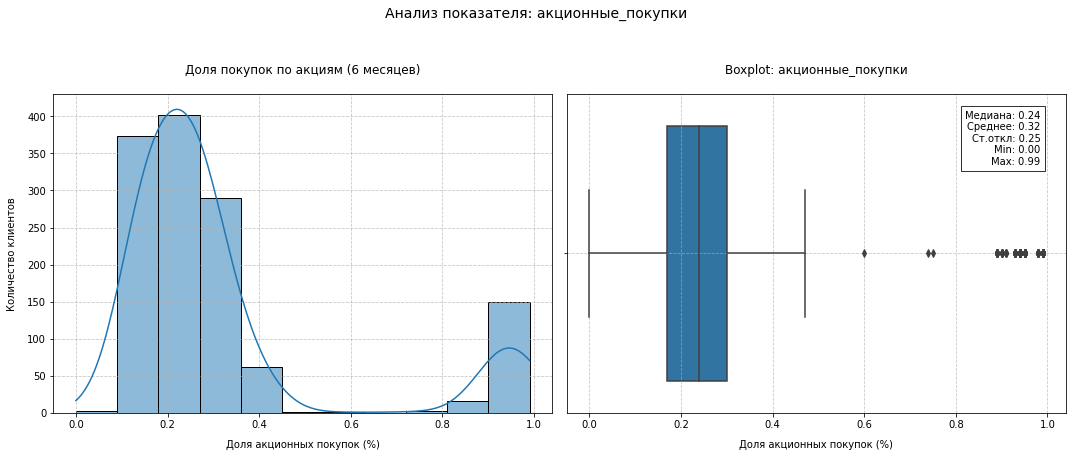

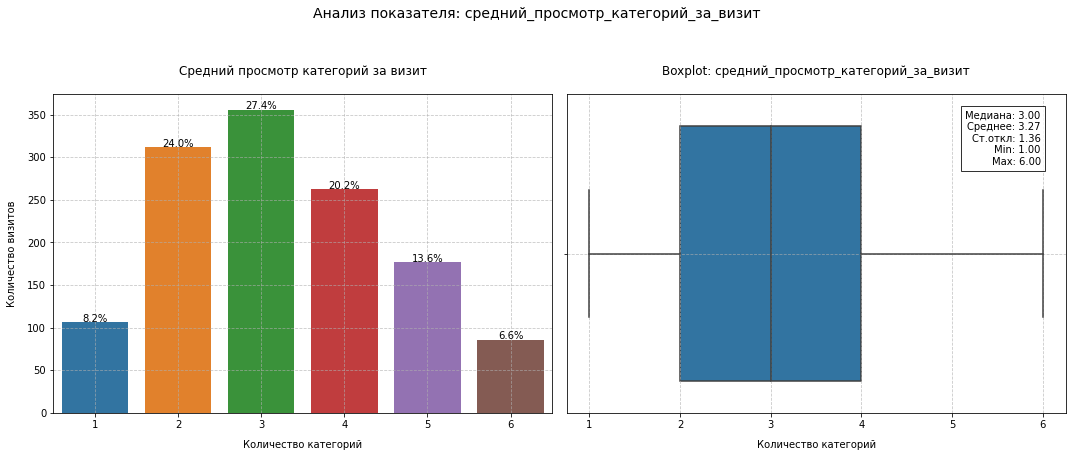

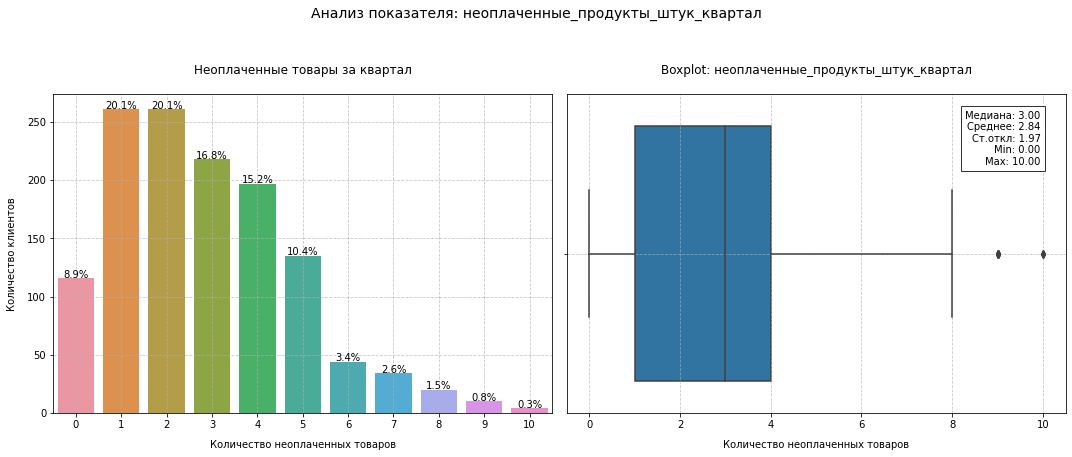

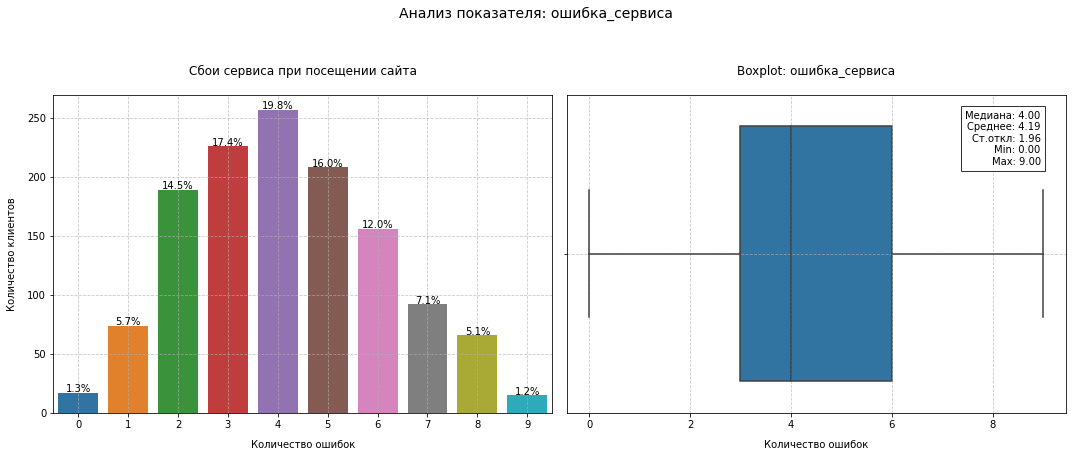

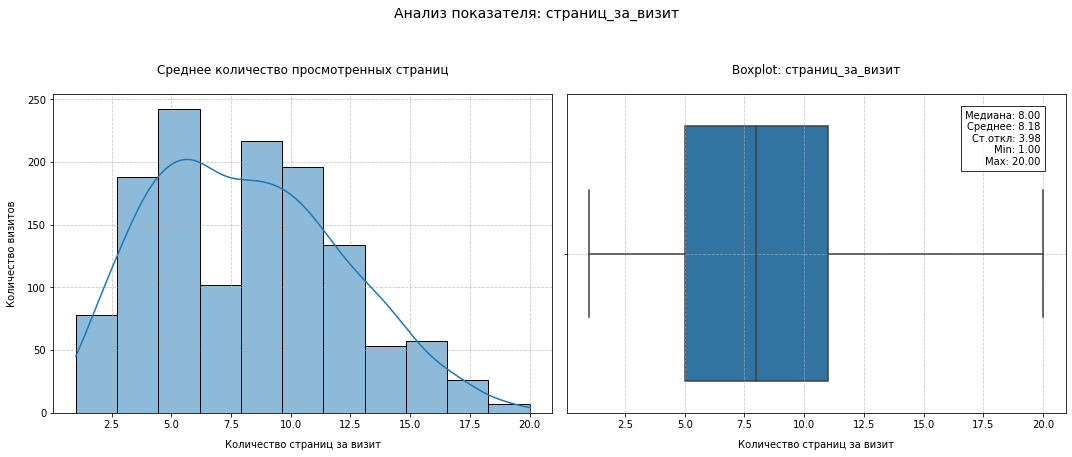


data_market_money


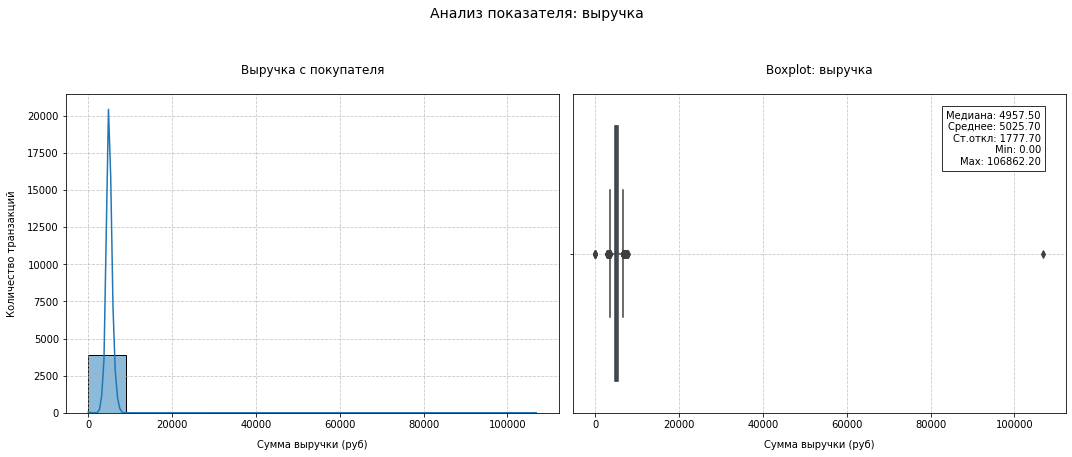


data_market_time


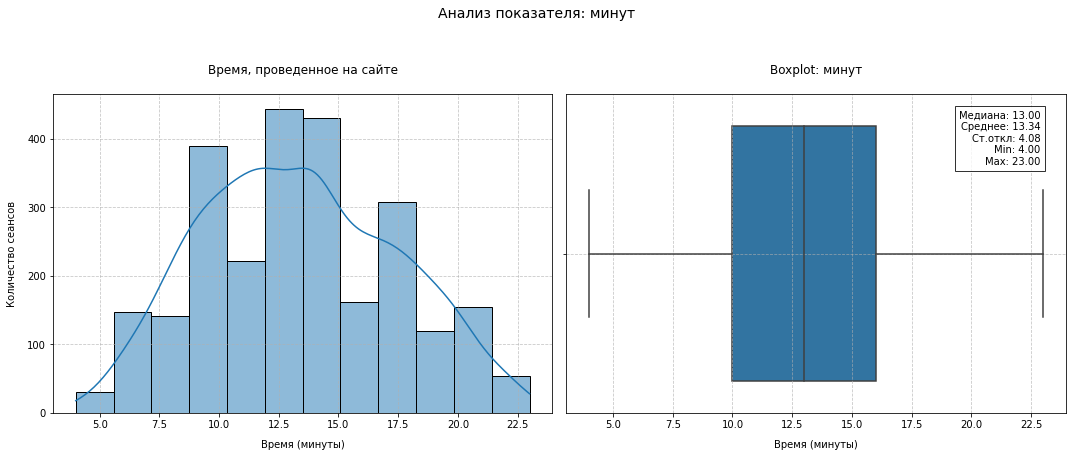


data_money


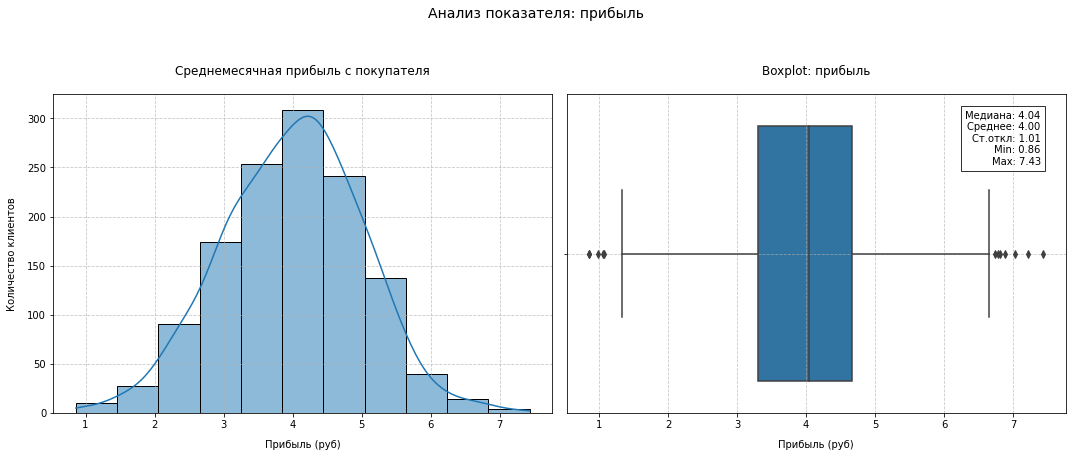

In [10]:
def plot_numerical_distributions(df, df_name):
    # Словарь с описаниями для осей графиков
    axis_labels = {
        'маркет_актив_6_мес': [
            'Среднемесячные маркетинговые коммуникации (6 месяцев)',
            'Количество коммуникаций (рассылки/звонки/реклама)',
            'Количество клиентов'
        ],
        'маркет_актив_тек_мес': [
            'Маркетинговые коммуникации в текущем месяце',
            'Количество коммуникаций',
            'Количество клиентов'
        ],
        'длительность': [
            'Длительность взаимодействия с сервисом',
            'Дней с момента регистрации',
            'Количество клиентов'
        ],
        'акционные_покупки': [
            'Доля покупок по акциям (6 месяцев)',
            'Доля акционных покупок (%)',
            'Количество клиентов'
        ],
        'средний_просмотр_категорий_за_визит': [
            'Средний просмотр категорий за визит',
            'Количество категорий',
            'Количество визитов'
        ],
        'неоплаченные_продукты_штук_квартал': [
            'Неоплаченные товары за квартал',
            'Количество неоплаченных товаров',
            'Количество клиентов'
        ],
        'ошибка_сервиса': [
            'Сбои сервиса при посещении сайта',
            'Количество ошибок',
            'Количество клиентов'
        ],
        'страниц_за_визит': [
            'Среднее количество просмотренных страниц',
            'Количество страниц за визит',
            'Количество визитов'
        ],
        'выручка': [
            'Выручка с покупателя',
            'Сумма выручки (руб)',
            'Количество транзакций'
        ],
        'минут': [
            'Время, проведенное на сайте',
            'Время (минуты)',
            'Количество сеансов'
        ],
        'прибыль': [
            'Среднемесячная прибыль с покупателя',
            'Прибыль (руб)',
            'Количество клиентов'
        ]
    }
    
    # Разделяем числовые столбцы на непрерывные и дискретные
    num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
               if col != 'id']
    
    if not num_cols:
        print(f"\nВ таблице {df_name} нет числовых столбцов для анализа")
        return
    
    print(f"\n{'='*60}")
    print(f'{df_name}')
    print(f"{'='*60}")
    
    for col in num_cols:
            # Получаем подписи для текущего столбца или используем значения по умолчанию
            title, xlabel, ylabel = axis_labels.get(col, 
                [f'Распределение {col}', f'{col}', 'Частота'])
            
            fig, axes = plt.subplots(1, 2, figsize=(15, 6))
            fig.suptitle(f'Анализ показателя: {col}', fontsize=14, y=1.05)
            
            # Определяем, является ли признак дискретным
            is_discrete = (len(df[col].unique()) < 20) or (col in [
                'маркет_актив_тек_мес',
                'средний_просмотр_категорий_за_визит',
                'неоплаченные_продукты_штук_квартал',
                'ошибка_сервиса'
            ])
            
            if is_discrete:
                # Для дискретных признаков используем countplot
                sns.countplot(x=df[col], ax=axes[0])
                axes[0].set_title(title, pad=20)
                axes[0].set_xlabel(xlabel, labelpad=10)
                axes[0].set_ylabel(ylabel, labelpad=10)
                axes[0].grid(True, linestyle='--', alpha=0.7)
                
                # Добавляем проценты над столбцами
                total = len(df[col])
                for p in axes[0].patches:
                    height = p.get_height()
                    if total > 0:
                        axes[0].text(p.get_x() + p.get_width()/2., height + 0.5,
                                    f'{height/total:.1%}', ha='center')
            else:
                # Для непрерывных признаков используем гистограмму
                sns.histplot(df[col], kde=True, ax=axes[0], 
                             bins=int(np.log2(len(df[col]))) + 1)
                axes[0].set_title(title, pad=20)
                axes[0].set_xlabel(xlabel, labelpad=10)
                axes[0].set_ylabel(ylabel, labelpad=10)
                axes[0].grid(True, linestyle='--', alpha=0.7)
            
            # Boxplot для всех числовых признаков
            sns.boxplot(x=df[col], ax=axes[1])
            axes[1].set_title(f'Boxplot: {col}', pad=20)
            axes[1].set_xlabel(xlabel, labelpad=10)
            axes[1].grid(True, linestyle='--', alpha=0.7)
            
            # Добавляем статистику
            stats = df[col].describe()
            stats_text = (
                f"Медиана: {stats['50%']:.2f}\n"
                f"Среднее: {stats['mean']:.2f}\n"
                f"Ст.откл: {stats['std']:.2f}\n"
                f"Min: {stats['min']:.2f}\n"
                f"Max: {stats['max']:.2f}"
            )
            axes[1].text(0.95, 0.95, stats_text, transform=axes[1].transAxes,
                        ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))
            
            plt.tight_layout()
            plt.show()
            

for df_name, df in dataframes.items():
    plot_numerical_distributions(df, df_name)

**data_market_file**
- маркет_актив_6_мес - распределение похоже на нормальное со сдвигом вправо.
- маркет_актив_тек_мес - имеет всего три значения с медианой 4.
- длительность - распределение похоже на равномерное с небольшим пиком в центре.
- акционные покупки - бимодальное распределение. Второй пик в районе 1 говорит о том, что часть клиентов покупает преимущественно акционные товары. Создадим категориальный признак менее 0.7 - низкая акционная активность, более или равно 0.7 - высокая акционная активность.
- средний_просмотр_категорий_за_визит - распределение похоже на нормальное со сдвигом влево.
- неоплаченные_продукты_штук_квартал - распределение Пуассона. Наиболее вероятное значение - 1 и 2.
- ошибка_сервиса - распределение похоже на нормальное.
- страниц_за_визит - распределение Пуассона. Наиболее вероятное значение около 5.
  
**data_market_money**
- выручка - имеет явно нереалистичное значение - избавимся от него. Посмотрим обновленные графики для выручки.
  
**data_market_time**
- минут - распределение похоже на нормальное.
  
**data_money**
- прибыль - распределение похоже на нормальное.


Проверка нормальности распределений (data_market_file)


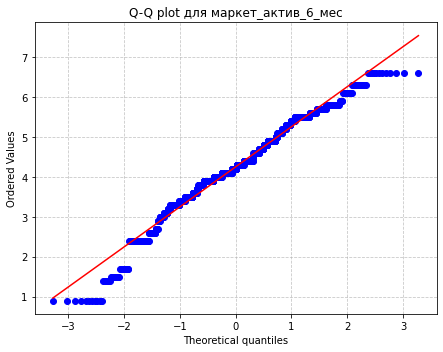


Анализ признака: маркет_актив_6_мес
Тест Шапиро-Уилка: W = 0.9780, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 52.8014, p-value = 0.0000
Асимметрия: -0.4448
Эксцесс: 0.6206
Заключение: распределение НЕ нормальное
--------------------------------------------------


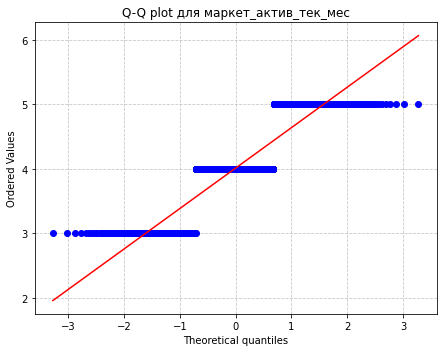


Анализ признака: маркет_актив_тек_мес
Тест Шапиро-Уилка: W = 0.8060, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 207.4848, p-value = 0.0000
Асимметрия: -0.0156
Эксцесс: -0.9383
Заключение: распределение НЕ нормальное
--------------------------------------------------


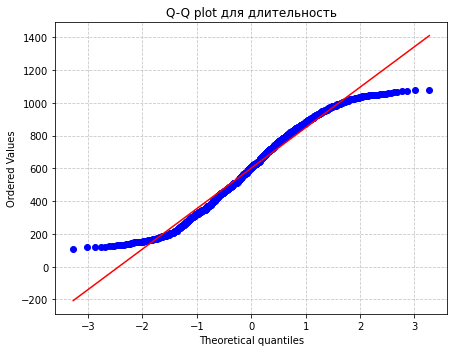


Анализ признака: длительность
Тест Шапиро-Уилка: W = 0.9727, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 274.0935, p-value = 0.0000
Асимметрия: -0.0628
Эксцесс: -0.9930
Заключение: распределение НЕ нормальное
--------------------------------------------------


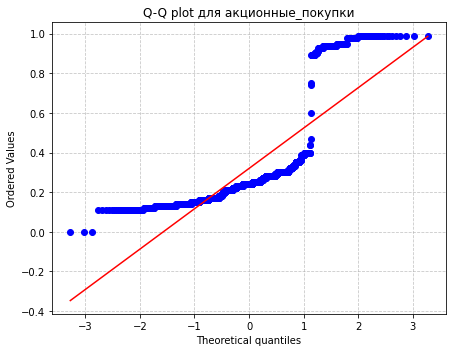


Анализ признака: акционные_покупки
Тест Шапиро-Уилка: W = 0.6621, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 435.6139, p-value = 0.0000
Асимметрия: 1.8954
Эксцесс: 2.1775
Заключение: распределение НЕ нормальное
--------------------------------------------------


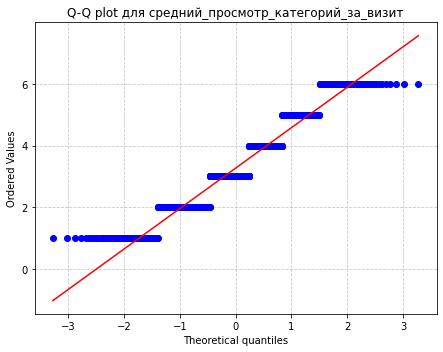


Анализ признака: средний_просмотр_категорий_за_визит
Тест Шапиро-Уилка: W = 0.9306, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 82.8852, p-value = 0.0000
Асимметрия: 0.2733
Эксцесс: -0.7001
Заключение: распределение НЕ нормальное
--------------------------------------------------


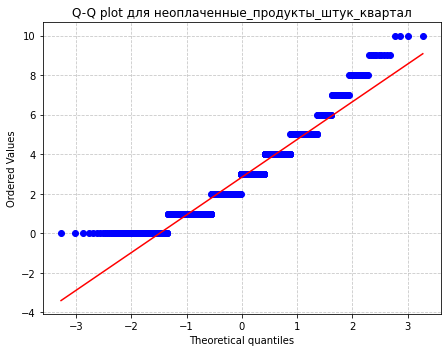


Анализ признака: неоплаченные_продукты_штук_квартал
Тест Шапиро-Уилка: W = 0.9329, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 110.7372, p-value = 0.0000
Асимметрия: 0.7668
Эксцесс: 0.4552
Заключение: распределение НЕ нормальное
--------------------------------------------------


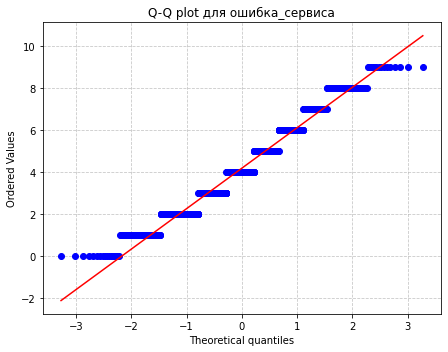


Анализ признака: ошибка_сервиса
Тест Шапиро-Уилка: W = 0.9659, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 39.2571, p-value = 0.0000
Асимметрия: 0.2521
Эксцесс: -0.5104
Заключение: распределение НЕ нормальное
--------------------------------------------------


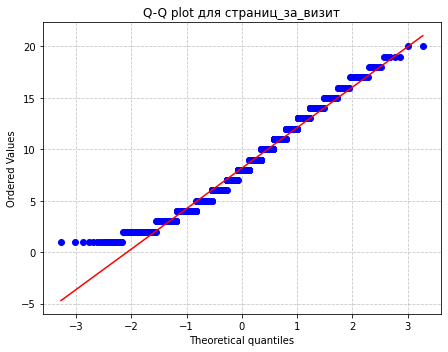


Анализ признака: страниц_за_визит
Тест Шапиро-Уилка: W = 0.9738, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 56.4188, p-value = 0.0000
Асимметрия: 0.3678
Эксцесс: -0.5297
Заключение: распределение НЕ нормальное
--------------------------------------------------

Проверка нормальности распределений (data_market_money)


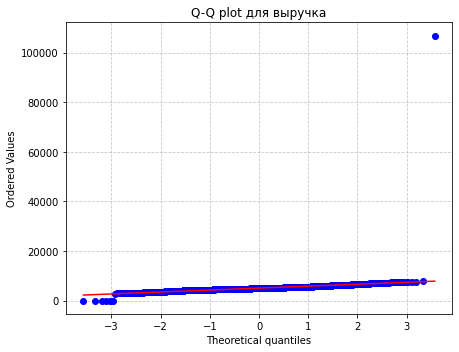


Анализ признака: выручка
Тест Шапиро-Уилка: W = 0.1978, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 12201.0829, p-value = 0.0000
Асимметрия: 48.2200
Эксцесс: 2763.4300
Заключение: распределение НЕ нормальное
--------------------------------------------------

Проверка нормальности распределений (data_market_time)


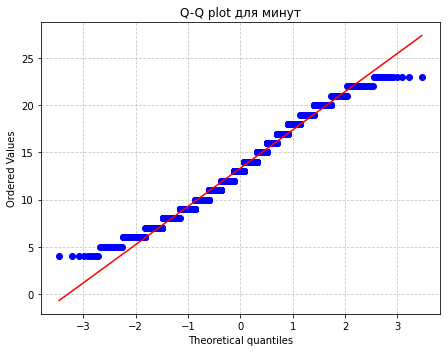


Анализ признака: минут
Тест Шапиро-Уилка: W = 0.9826, p-value = 0.0000
Тест на нормальность (D'Agostino): statistic = 142.5375, p-value = 0.0000
Асимметрия: 0.1552
Эксцесс: -0.6943
Заключение: распределение НЕ нормальное
--------------------------------------------------

Проверка нормальности распределений (data_money)


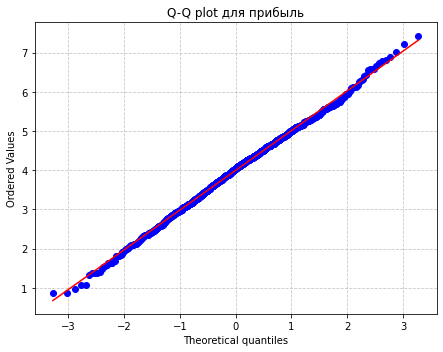


Анализ признака: прибыль
Тест Шапиро-Уилка: W = 0.9984, p-value = 0.2580
Тест на нормальность (D'Agostino): statistic = 1.4322, p-value = 0.4887
Асимметрия: -0.0762
Эксцесс: 0.0468
Заключение: распределение НОРМАЛЬНОЕ
--------------------------------------------------


In [11]:
def check_normality(df, df_name):
    """Функция для проверки нормальности распределения числовых признаков"""
    num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
               if col != 'id']
    
    if not num_cols:
        print(f"\nВ таблице {df_name} нет числовых столбцов для анализа")
        return
    
    print(f"\n{'='*60}")
    print(f'Проверка нормальности распределений ({df_name})')
    print(f"{'='*60}")
    
    for col in num_cols:

            
            data = df[col].dropna()
            
        
            plt.figure(figsize=(12, 5))
            
            # Q-Q plot
            plt.subplot(1, 2, 1)
            probplot(data, plot=plt)
            plt.title(f'Q-Q plot для {col}')
            plt.grid(True, linestyle='--', alpha=0.7)
            

            
            plt.tight_layout()
            plt.show()
            
            # Проводим тесты нормальности
            shapiro_stat, shapiro_p = shapiro(data)
            normaltest_stat, normaltest_p = normaltest(data)
            
            # Выводим результаты тестов
            print(f"\nАнализ признака: {col}")
            print(f"Тест Шапиро-Уилка: W = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
            print(f"Тест на нормальность (D'Agostino): statistic = {normaltest_stat:.4f}, p-value = {normaltest_p:.4f}")
            print(f"Асимметрия: {data.skew():.4f}")
            print(f"Эксцесс: {data.kurtosis():.4f}")
            
            # Интерпретация результатов
            alpha = 0.05
            if shapiro_p > alpha and normaltest_p > alpha:
                print("Заключение: распределение НОРМАЛЬНОЕ")
            else:
                print("Заключение: распределение НЕ нормальное")
            
            print("-"*50)
            

            
for df_name, df in dataframes.items():

    check_normality(df, df_name)

In [12]:
# Создаем новый категориальный признак
data_market_file['акционная_активность'] = np.where(
    data_market_file['акционные_покупки'] < 0.7,
    'низкая',
    'высокая'
)

Посмотрим на экстремальный выброс в data_market_money:

In [13]:
data_market_money.nlargest(5, 'выручка')

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8


Явно нереалистичное значение - избавимся от него. Посмотрим обновленные графики для выручки.

In [14]:
data_market_money = data_market_money.query('выручка < 100000')

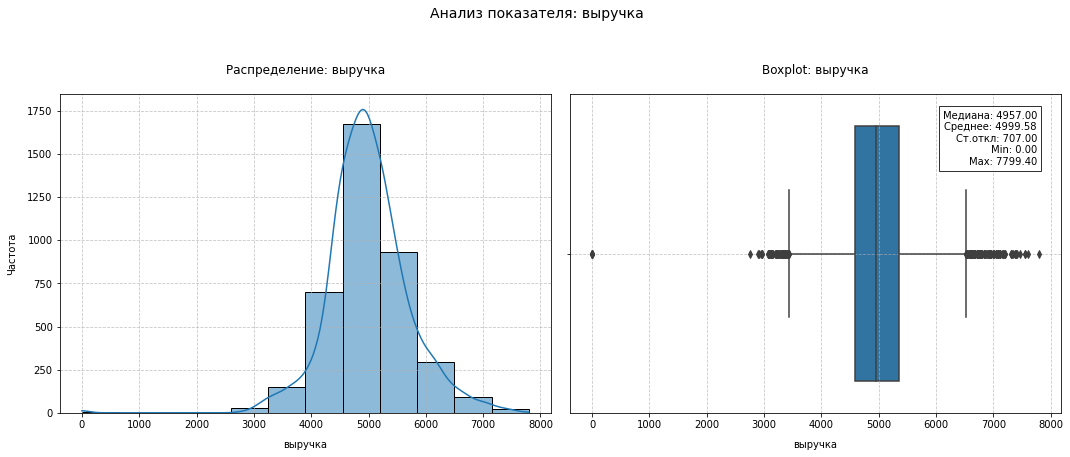

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'Анализ показателя: выручка', fontsize=14, y=1.05)
            
sns.histplot(data_market_money['выручка'], kde=True, ax=axes[0], bins=int(np.log2(len(data_market_money['выручка']))) + 1)
axes[0].set_title(f'Распределение: выручка', pad=20)
axes[0].set_xlabel(f'выручка', labelpad=10)
axes[0].set_ylabel('Частота', labelpad=10)
axes[0].grid(True, linestyle='--', alpha=0.7)
            
sns.boxplot(x=data_market_money['выручка'], ax=axes[1])
axes[1].set_title(f'Boxplot: выручка', pad=20)
axes[1].set_xlabel(f'выручка', labelpad=10)
axes[1].grid(True, linestyle='--', alpha=0.7)
            
stats = data_market_money['выручка'].describe()
stats_text = (
    f"Медиана: {stats['50%']:.2f}\n"
    f"Среднее: {stats['mean']:.2f}\n"
    f"Ст.откл: {stats['std']:.2f}\n"
    f"Min: {stats['min']:.2f}\n"
    f"Max: {stats['max']:.2f}"
)
axes[1].text(0.95, 0.95, stats_text, transform=axes[1].transAxes,
            ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))
            
plt.tight_layout()
plt.show()

Проанализируем категориальные признаки.


data_market_file


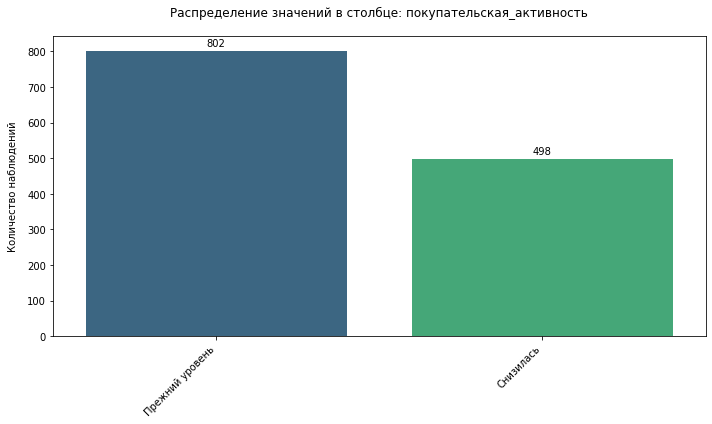

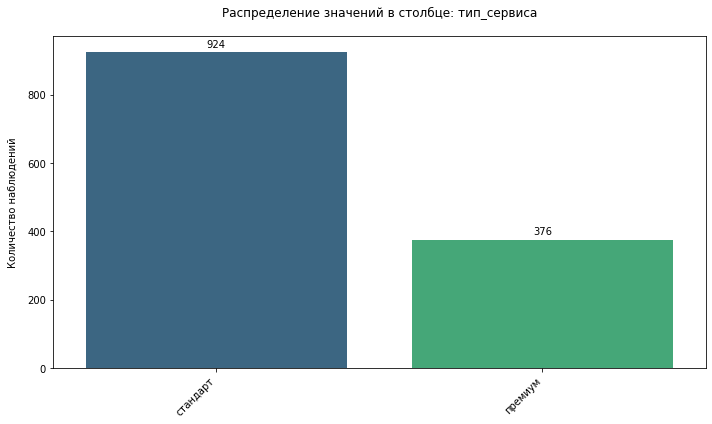

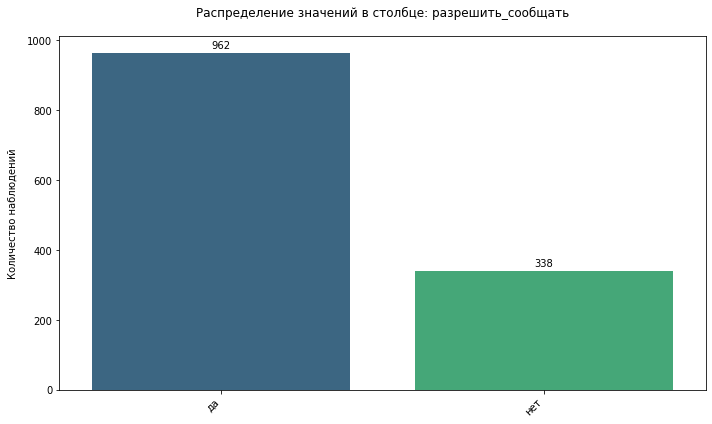

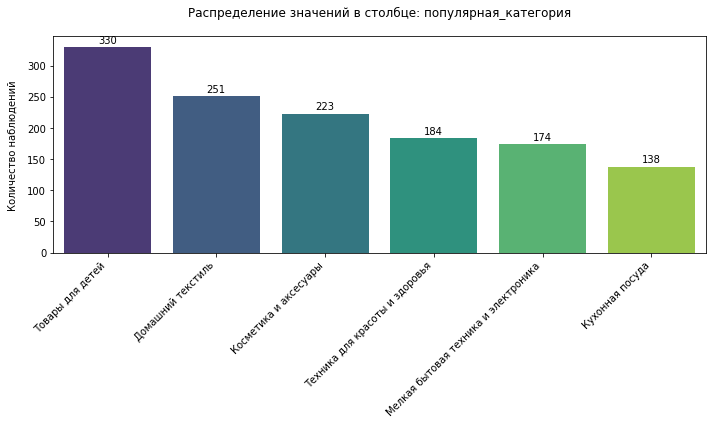

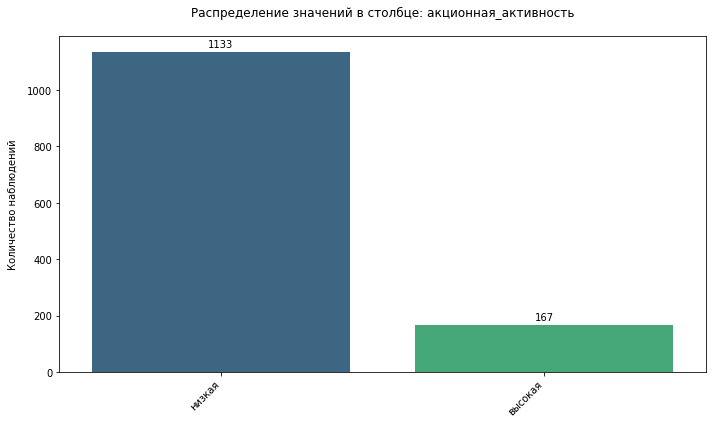


data_market_money


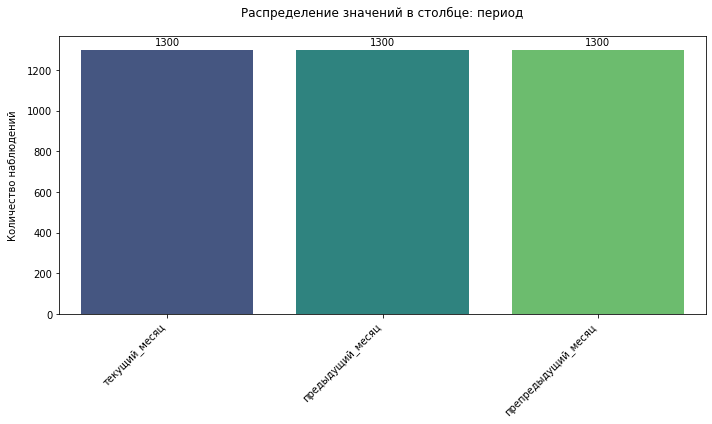


data_market_time


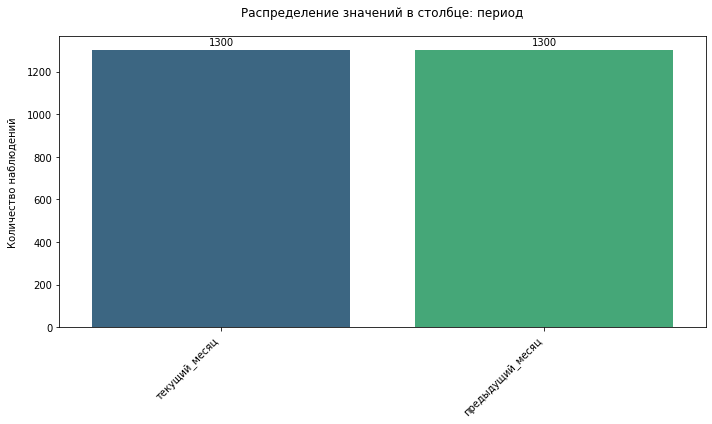


В таблице data_money нет категориальных столбцов для анализа


In [16]:
def plot_categorical_distributions(df, df_name):

    cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns 
               if col != 'id']
    
    if not cat_cols:
        print(f"\nВ таблице {df_name} нет категориальных столбцов для анализа")
        return
    
    print(f"\n{'='*60}")
    print(f'{df_name}')
    print(f"{'='*60}")
    
    for col in cat_cols:
        try:
            plt.figure(figsize=(10, 6))
            
            value_counts = df[col].value_counts().sort_values(ascending=False)
            ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
            
            plt.title(f'Распределение значений в столбце: {col}', pad=20)
            
            plt.ylabel('Количество наблюдений', labelpad=10)
            plt.xticks(rotation=45, ha='right')
            
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.01*max(value_counts), str(v), 
                        ha='center', va='bottom', fontsize=10)
            
            plt.tight_layout()
            plt.show()
            
            
        except Exception as e:
            print(f"Ошибка при построении графиков для {col}: {str(e)}")

for df_name, df in dataframes.items():
    plot_categorical_distributions(df, df_name)

**data_market_file**  
Больше пользователей, которые разрешают сообщать об акциях. Самая популярная категория товара - товары для детей. Присутствует дисбаланс классов целевого признака - покупательская активность.
  
**data_market_money**
- период - данные по месяцам распределены равномерно.
  
**data_market_time**
- период - данные по месяцам распределены равномерно.

Отоберём клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [17]:
actual_purchases = data_market_money[data_market_money['выручка'] > 0]
client_activity = actual_purchases.groupby('id')['период'].nunique()
active_clients = client_activity[client_activity == 3].index.tolist()

print(f"Клиентов с покупками в 3х месяцах: {len(active_clients)}")

Клиентов с покупками в 3х месяцах: 1296


В ходе исследовательского анализа:
- добавлен категориальный признак "акционная активность"
- удален аномальный выброс по выручке
- отобраны пользователи, которые проявляли покупательскую активность на протяжении трех месяцев

## Объединение таблиц

In [18]:
money_df = (
    data_market_money[data_market_money['id'].isin(active_clients)]
    .pivot(index='id', columns='период', values='выручка')
    .add_prefix('выручка_')
    .reset_index()
)

time_df = (
    data_market_time[data_market_time['id'].isin(active_clients)]
    .pivot(index='id', columns='период', values='минут')
    .add_prefix('время_')
    .reset_index()
)

final_data = (
    data_market_file[data_market_file['id'].isin(active_clients)]
    .merge(money_df, on='id', how='left')
    .merge(time_df, on='id', how='left')
)

# Проверка результата
print(f"Итоговая таблица: {final_data.shape}")
final_data.head(3)

Итоговая таблица: (1296, 19)


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционная_активность,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,высокая,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,низкая,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,высокая,6158.0,4793.0,6610.4,11,13


Был создан единый датафрейм для дальнейшего анализа.

## Корреляционный анализ

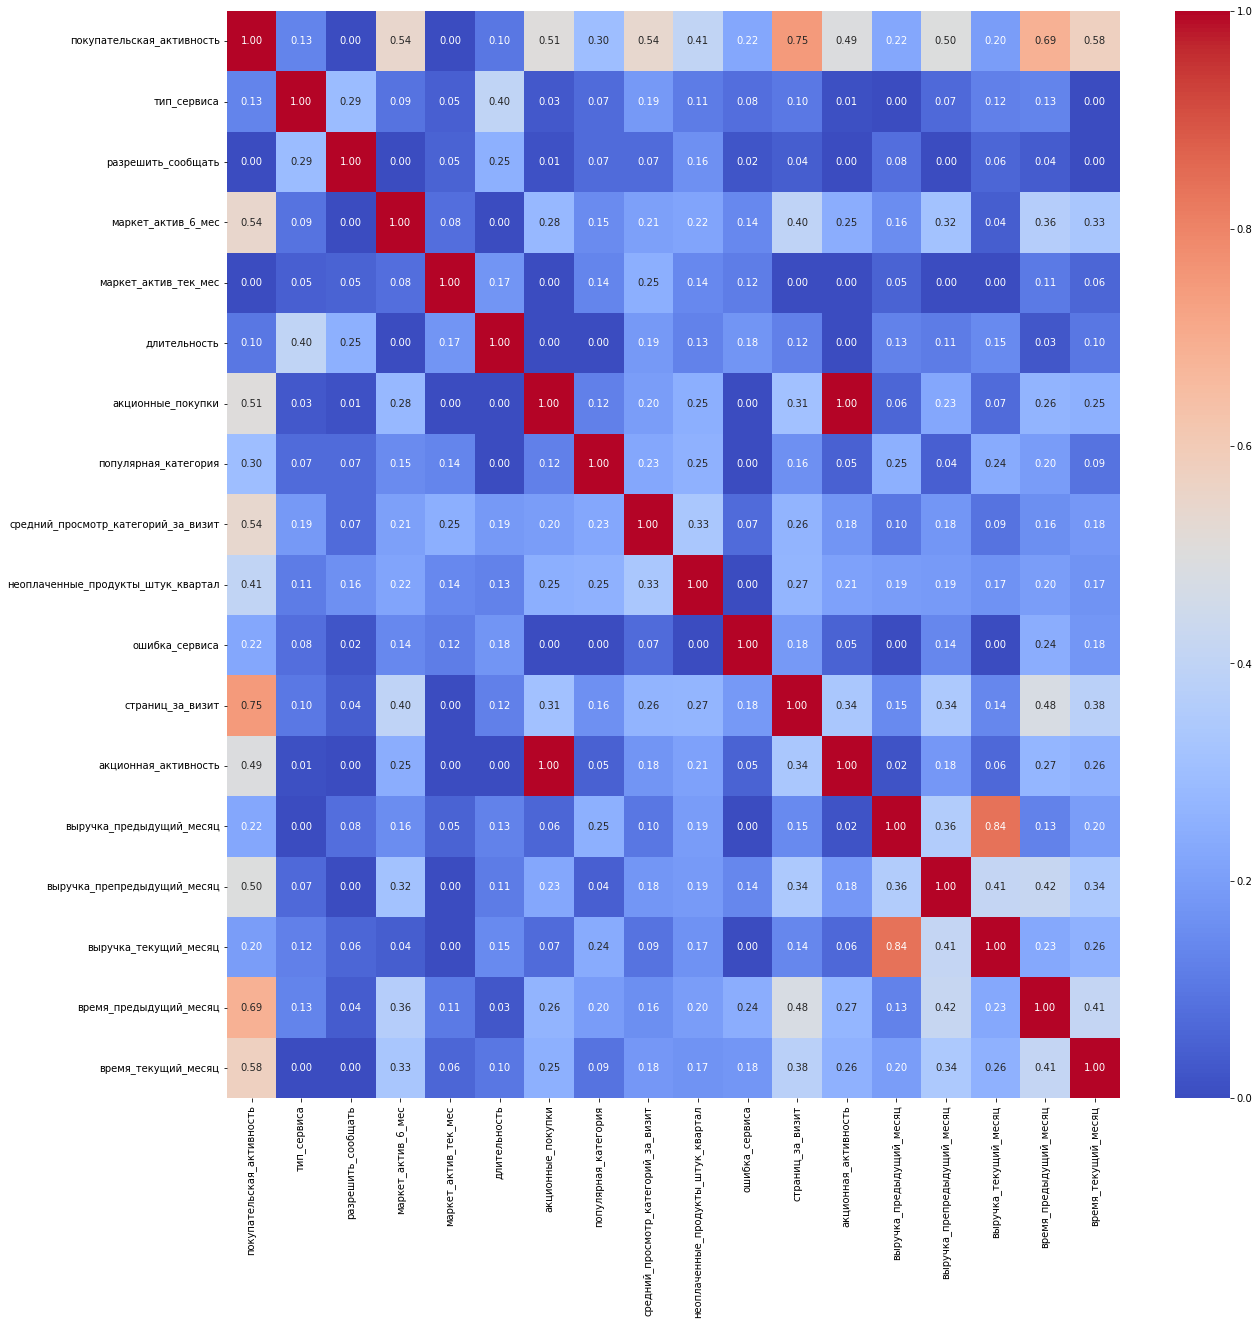

In [19]:
final_data_quant_cols = [
    'маркет_актив_6_мес', 
    'длительность',
    'акционные_покупки',  
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'время_предыдущий_месяц',
    'время_текущий_месяц'
]

plt.figure(figsize=(20, 20))

sns.heatmap(
    final_data.drop('id', axis=1).phik_matrix(
        interval_cols=final_data_quant_cols
    ), annot=True, cmap='coolwarm', fmt='.2f'
)

plt.show()

Cильно коррелирующие признаки (коэффициент корреляции >= 0.75):
- акционные_покупки и акционная_активность
- выручка_предыдущий_месяц и выручка_текущий_месяц

Для устранения мультиколлиниарности удалим следующие признаки:
- акционные_покупки
- выручка_текущий_месяц

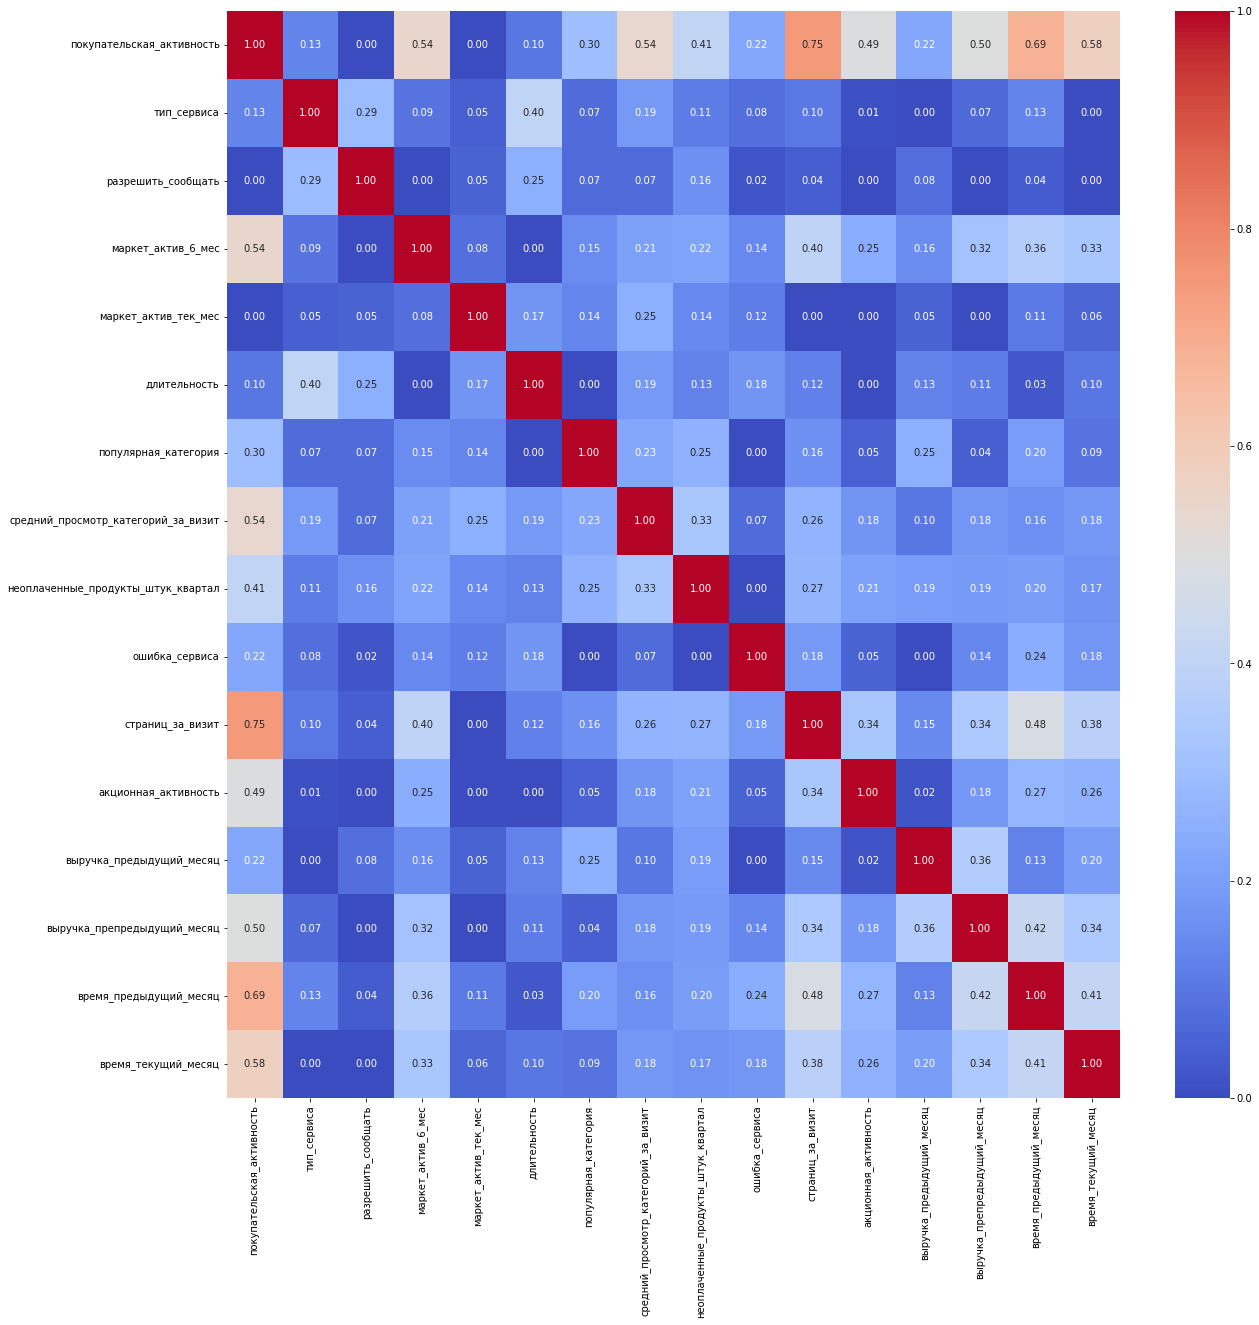

In [20]:
final_data = final_data.drop(columns=['акционные_покупки', 'выручка_текущий_месяц'])

final_data_quant_cols = [
    'маркет_актив_6_мес', 
    'длительность', 
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'время_предыдущий_месяц',
    'время_текущий_месяц'
]

plt.figure(figsize=(20, 20))

sns.heatmap(
    final_data.drop('id', axis=1).phik_matrix(
        interval_cols=final_data_quant_cols
    ), annot=True, cmap='coolwarm', fmt='.2f'
)

plt.show()

В процессе корреляционного анализа была устранена мультиколлинеарность и удалены признаки акционные_покупки и выручка_текущий_месяц.

## Использование пайплайнов

In [21]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    final_data.drop(['id', 'покупательская_активность'], axis=1),
    final_data['покупательская_активность'],
    stratify=final_data['покупательская_активность'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((972, 15), (324, 15))

In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [24]:
ohe_columns = [
    'популярная_категория',
    'тип_сервиса',
    'разрешить_сообщать'
]

ord_columns = [
    'акционная_активность'
]

num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'время_предыдущий_месяц',
    'время_текущий_месяц'
]

ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['низкая', 'высокая']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # Словарь для DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Словарь для KNeighborsClassifier
#    {
#        'models': [KNeighborsClassifier()],
#        'models__n_neighbors': range(2, 5),
#        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
#    },

    # Словарь для LogisticRegression
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # Cловарь для SVC
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            probability=True
        )],
        'models__kernel': ['poly', 'rbf'],
        'models__degree': (2,3,4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] 
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_test_pred_proba = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_encoded, y_test_pred_proba)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория',
                                                   'тип_сервиса',
                                                   'разрешить_сообщать']),
                                                 ('ord',
                                                  Pipeline(ste

В качестве метрики была выбрана roc-auc, так как важны и precision и recall. roc-auc чаще используется в задачах бинарной классификации для оценки способности модели разделять классы, независимо от баланса классов.  
  
Лучше всего справился пайплайн со следующими параметрами: LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear').

## Анализ важности признаков

In [25]:
best_pipeline = randomized_search.best_estimator_
preprocessor = best_pipeline.named_steps['preprocessor']
model = best_pipeline.named_steps['models']

X_train_transformed = preprocessor.transform(X_train)

num_feature_names = num_columns

ohe_encoder = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_feature_names = ohe_encoder.get_feature_names_out(ohe_columns)

ord_feature_names = ord_columns

feature_names = list(ohe_feature_names) + ord_feature_names + num_columns

explainer = shap.LinearExplainer(model, X_train_transformed, feature_names=feature_names)
shap_values = explainer(X_train_transformed)

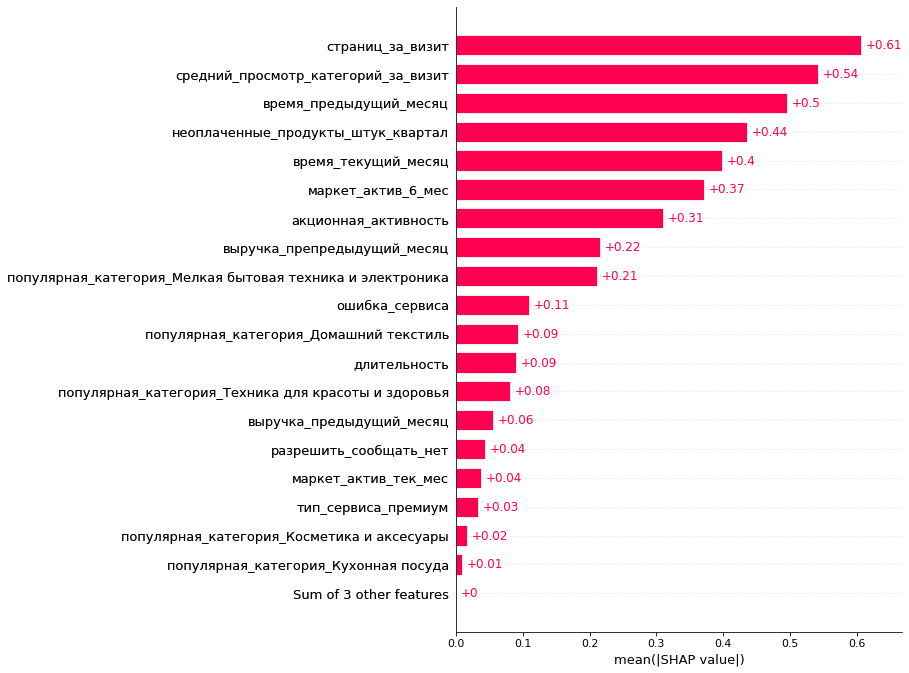

In [26]:
shap.plots.bar(shap_values, max_display=20)

Самые важные признаки:
- страниц_за_визит
- средний_просмотр_категорий_за_визит
- время_предыдущий_месяц
- неоплаченные_продукты_штук_квартал
- время_текущий_месяц
- маркет_актив_6_мес
  
Малозначимые признаки:
- популярная_категория_Косметика и аксесуары
- тип_сервиса_стандарт
- популярная_категория_Кухонная посуда
- маркет_актив_тек_мес
- разрешить_сообщать_нет
- популярная_категория_Товары для детей

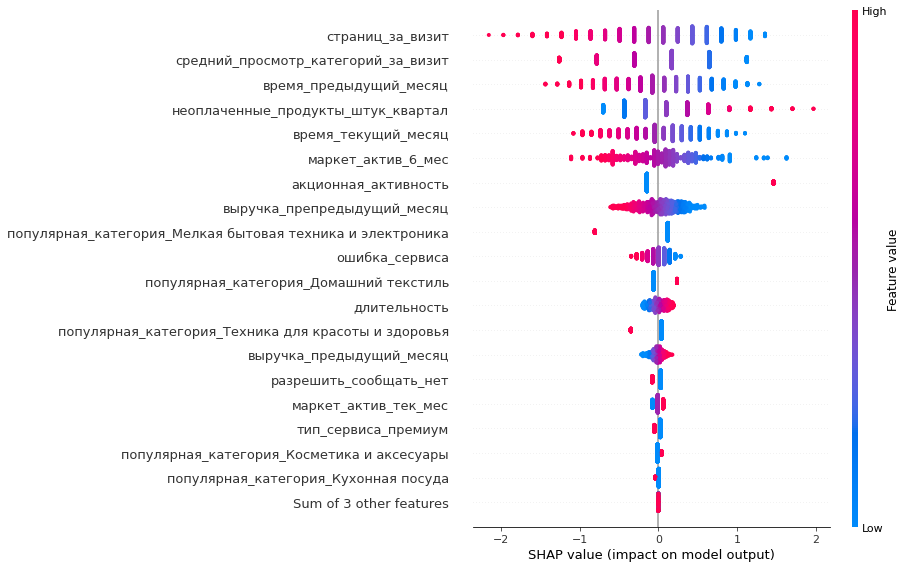

In [27]:
shap.plots.beeswarm(shap_values, max_display=20)

Увеличивают вероятность отнесения к класссу активность "снизилась" низкие значения:
- страниц за визит
- средний просмотр категорий за визит
- время предыдущий месяц
- время текущий месяц
- маркет актив 6 мес  
И высокие значения:
- неоплаченные продукты штук квартал

## Сегментация покупателей

In [28]:
# Добавляем прибыль в финальный датафрейм
final_data = final_data.merge(data_money, on='id', how='left')

# Определяем квартили прибыли
profit_q25 = final_data['прибыль'].quantile(0.25)
profit_q75 = final_data['прибыль'].quantile(0.75)

# Сегментация
final_data['сегмент'] = np.where(
    (final_data['покупательская_активность'] == 'Снизилась') & (final_data['прибыль'] >= profit_q75),
    'Группа риска',
    np.where(
        final_data['прибыль'] <= profit_q25,
        'Низкоприбыльные',
        'Стабильные'
    )
)

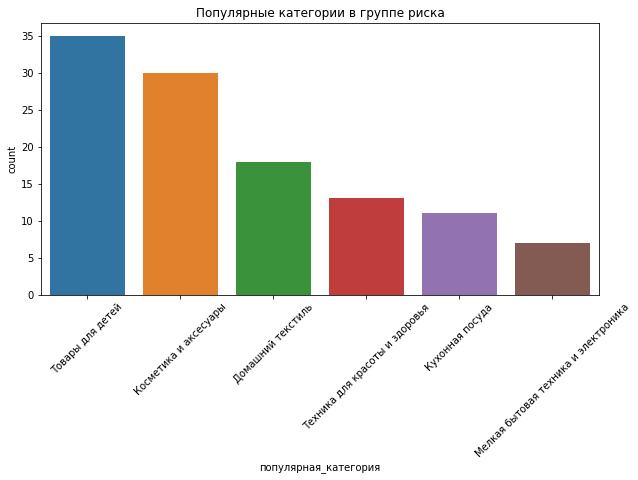

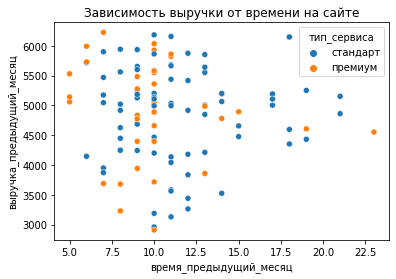

In [29]:
risk_group = final_data[final_data['сегмент'] == 'Группа риска']

# Распределение популярных категорий
plt.figure(figsize=(10, 5))
sns.countplot(data=risk_group, x='популярная_категория', order=risk_group['популярная_категория'].value_counts().index)
plt.title('Популярные категории в группе риска')
plt.xticks(rotation=45)
plt.show()

# Время на сайте vs. Выручка
sns.scatterplot(data=risk_group, x='время_предыдущий_месяц', y='выручка_предыдущий_месяц', hue='тип_сервиса')
plt.title('Зависимость выручки от времени на сайте')
plt.show()

Большинство покупателей группы риска выбирают "товары для детей" и "косметику".  
Высокая доля акционнных покупок способствует снижению активности. Таких пользователей интересуют только акционные товары.  
Низкое количество категорий, просматриваемых за визит, увеличивает вероятность потери клиента.  
Низкое количество страниц, просмотренных за визит, ощутимо снижает вероятность удержать пользователя.  
Малое количество времени, проводимого на сайте, способствует потере клиента.

Предложения
- Скидки на популярные категории ("товары для детей", "косметика").
- Повысить релевантность рассылок (например, напоминания о брошенных корзинах и предоставление скидок на такие товары).
- Эксклюзивные предложения для пользователей с высокой долей акционных покупок для их удержания.
- Снизить число ошибок сервиса.
  
Выводы  
Группа риска - высокоприбыльные клиенты с падающей активностью.
Данный сегмент выбран, потому что потеря данных клиентов критична для выручки магазина.  
Предложения: Персонализация, улучшение сервиса и точечный маркетинг. Например, для клиентов с популярной категорией "косметика" можно предложить пробники в качестве подарка.

## Вывод

В ходе проекта необходимо было:
- Разработать модель, которая предскажет вероятность снижения покупательской активности.
- Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность.
  
Данные для работы находятся в нескольких таблицах.  
- market_file.csv - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- market_money.csv - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- market_time.csv - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- money.csv - Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
  
Предобработка данных включала следующие шаги:
- переименование столбцов;
- приведение типов;
- проверка на пропуски;
- проверка дубликатов.  
Кроме того, были проведены исследовательский и корреляционный анализ данных, в процессе которых были отобраны признаки и устранена мультиколлинеарность.  
  
В процессе поиска лучшей модели были обучены следующие модели с разными параметрами:
-KNeighborsClassifier();
-DecisionTreeClassifier();
-LogisticRegression();
-SVC().
  
Лучшим пайплайном оказался LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear')  

Предложения
- Скидки на популярные категории ("товары для детей", "косметика").
- Повысить релевантность рассылок (например, напоминания о брошенных корзинах и предоставление скидок на такие товары).
- Эксклюзивные предложения для пользователей с высокой долей акционных покупок для их удержания.
- Снизить число ошибок сервиса.
  
Группа риска - высокоприбыльные клиенты с падающей активностью. Потеря данных клиентов критична для выручки магазина.  
Предложения: Персонализация, улучшение сервиса и точечный маркетинг. Например, для клиентов с популярной категорией "косметика" можно предложить пробники в качестве подарка.

https://github.com/Via4eslavP/supervised-learning